In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Python Data Analysis/AB_Testing2/cookie_cats.xlsx')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116.0,gate_30,3.0,False,False
1,337.0,gate_30,38.0,True,False
2,377.0,gate_40,165.0,True,False
3,483.0,gate_40,1.0,False,False
4,488.0,gate_40,179.0,True,True


In [7]:
# replace yes/no
df['retention_1'] = df['retention_1'].replace([True], 1)
df['retention_1'] = df['retention_1'].replace([False], 0)
df['retention_7'] = df['retention_7'].replace([True], 1)
df['retention_7'] = df['retention_7'].replace([False], 0)
df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116.0,gate_30,3.0,0,0
1,337.0,gate_30,38.0,1,0
2,377.0,gate_40,165.0,1,0
3,483.0,gate_40,1.0,0,0
4,488.0,gate_40,179.0,1,1


In [8]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [9]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [10]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0.0        3994
1.0        5538
2.0        4606
3.0        3958
4.0        3629
           ... 
2294.0        1
2438.0        1
2640.0        1
2961.0        1
49854.0       1
Name: userid, Length: 942, dtype: int64

Text(0.5, 0, '# Game rounds')

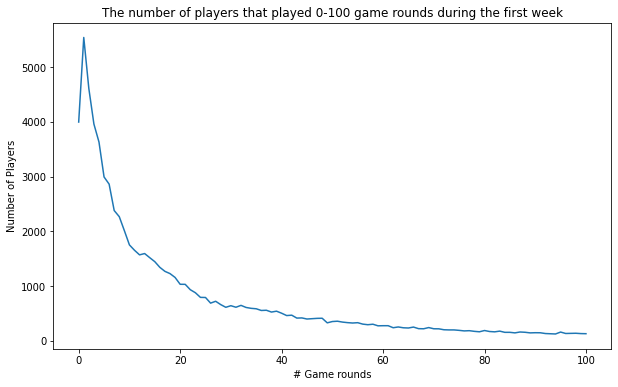

In [11]:
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Text(0.5, 0, '# Game rounds')

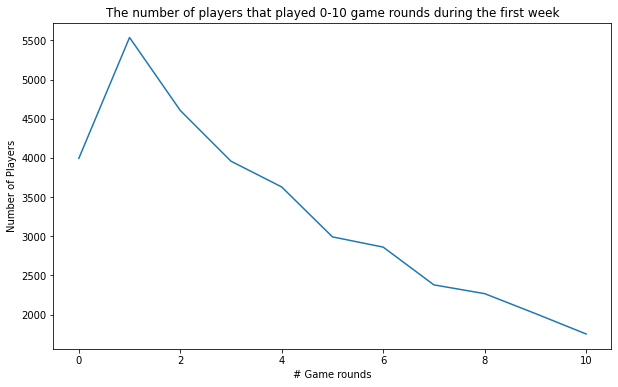

In [12]:
ax = plot_df[:10].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-10 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Text(0.5, 0, '# Game rounds')

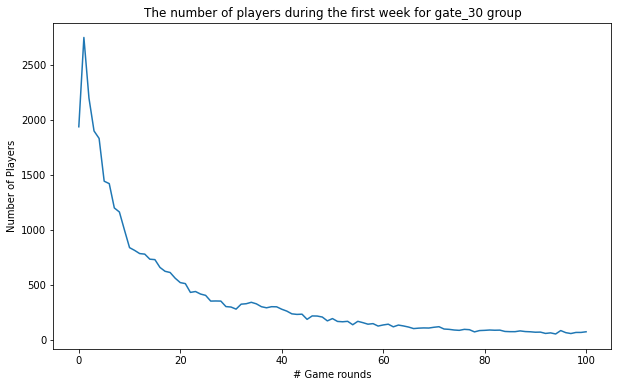

In [13]:
gate_30_df = df.loc[df['version']=='gate_30']
gate_30_plot = gate_30_df.groupby('sum_gamerounds')['userid'].count()
ax = gate_30_plot[:100].plot(figsize=(10,6))
ax.set_title("The number of players during the first week for gate_30 group")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [14]:
gate_30_df['sum_gamerounds'].describe()

count    44700.000000
mean        52.456264
std        256.716423
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

Text(0.5, 0, '# Game rounds')

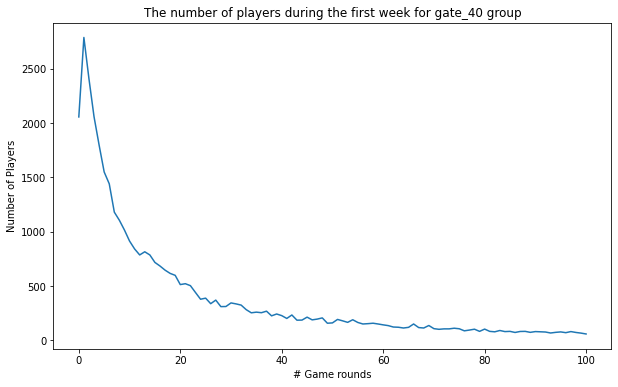

In [15]:
gate_40_df = df.loc[df['version']=='gate_40']
gate_40_plot = gate_40_df.groupby('sum_gamerounds')['userid'].count()
ax = gate_40_plot[:100].plot(figsize=(10,6))
ax.set_title("The number of players during the first week for gate_40 group")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [17]:
gate_40_df['sum_gamerounds'].describe()

count    45489.000000
mean        51.298776
std        103.294416
min          0.000000
25%          5.000000
50%         16.000000
75%         52.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

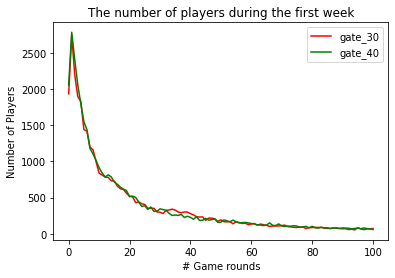

<Figure size 720x432 with 0 Axes>

In [18]:
plt.plot(gate_30_plot[:100], color='r', label='gate_30' )
plt.plot(gate_40_plot[:100], color='g', label='gate_40' )
plt.xlabel('# Game rounds')
plt.ylabel("Number of Players")
plt.title("The number of players during the first week")
plt.legend()
plt.figure(figsize=(10,6))
plt.show()


# A/B Test for retention 1

In [19]:
df[['userid','version','retention_1']].groupby('version').agg({'userid':'count','retention_1':'mean'})

,userid,retention_1
version,,
gate_30,44700,0.448188
gate_40,45489,0.442283


In [20]:
gate_30_retention1 = df[df.version=='gate_30'].retention_1.sum()
gate_40_retention1 = df[df.version=='gate_40'].retention_1.sum()
n_gate_30 = len(df[df.version=='gate_30'].retention_1)
n_gate_40 = len(df[df.version=='gate_40'].retention_1)

gate_30_retention1,gate_40_retention1,n_gate_30,n_gate_40

(20034, 20119, 44700, 45489)

In [21]:
retention1_dic = {'Num_users':{'Gate_30':n_gate_30,'Gate_40':n_gate_40},
                  'Retention': {'Gate_30':gate_30_retention1,'Gate_40':gate_40_retention1}}
retention_table = pd.DataFrame(retention1_dic)
retention_table['Retention_rate']=retention_table['Retention']/retention_table['Num_users']
retention_table = retention_table.style.format({'Retention_rate': "{:.2%}"})
retention_table

,Num_users,Retention,Retention_rate
Gate_30,44700,20034,44.82%
Gate_40,45489,20119,44.23%


In [25]:
def z_test(p1,p0,n1,n0):
    delta = p1-p0
    p = (p1*n1 + p0*n0) / (n1+n0)
    return delta / np.sqrt(p*(1-p)*(1/n1 + 1/n0))

In [22]:
p1 = gate_30_retention1 / n_gate_30
p0 = gate_40_retention1 / n_gate_40
n1 = n_gate_30
n0 = n_gate_40

In [26]:
z_value = z_test(p1,p0,n1,n0)
z_value

1.7840862247974725

In [27]:
from scipy.stats import norm
p_value = 1- norm.cdf(z_value)

p_value


0.03720482764845956

p-value is less than 0.05, so we can reject null hypothesis and accept alternative hypothesis that the retention rate of gate_30 is larger than the retention rate of gate_40 for 1 day after the customer meet the gate.

# A/B Test for retention 7



In [28]:
df[['userid','version','retention_7']].groupby('version').agg({'userid':'count','retention_7':'mean'})

,userid,retention_7
version,,
gate_30,44700,0.190201
gate_40,45489,0.182000


In [29]:
gate_30_retention7 = df[df.version=='gate_30'].retention_7.sum()
gate_40_retention7 = df[df.version=='gate_40'].retention_7.sum()
n_gate_30_7 = len(df[df.version=='gate_30'].retention_7)
n_gate_40_7 = len(df[df.version=='gate_40'].retention_7)

gate_30_retention7,gate_40_retention7,n_gate_30_7,n_gate_40_7

(8502, 8279, 44700, 45489)

In [30]:
retention7_dic = {'Num_users':{'Gate_30':n_gate_30_7,'Gate_40':n_gate_40_7},
                  'Retention': {'Gate_30':gate_30_retention7,'Gate_40':gate_40_retention7}}
retention_table = pd.DataFrame(retention7_dic)
retention_table['Retention_rate']=retention_table['Retention']/retention_table['Num_users']
retention_table = retention_table.style.format({'Retention_rate': "{:.2%}"})
retention_table

,Num_users,Retention,Retention_rate
Gate_30,44700,8502,19.02%
Gate_40,45489,8279,18.20%


In [31]:
p1 = gate_30_retention7 / n_gate_30_7
p0 = gate_40_retention7 / n_gate_40_7
n1 = n_gate_30_7
n0 = n_gate_40_7

In [32]:
z_value = z_test(p1,p0,n1,n0)
z_value

3.164358912748191

In [33]:
p_value = 1- norm.cdf(z_value)

p_value

0.0007771249878071318

p-value is less than 0.05, so we can reject null hypothesis and accept alternative hypothesis that the retention rate of gate_30 is larger than the retention rate of gate_40 for 7 days after the customer meet the gate.

# Z-test in Statsmodels

In [34]:
import statsmodels.api as sm

In [35]:
z_score_1, p_value_1 = sm.stats.proportions_ztest([gate_30_retention1, gate_40_retention1], [n_gate_30, n_gate_40], alternative='larger')
z_score_1, p_value_1

(1.7840862247974725, 0.03720482764845957)

In [36]:
z_score_7, p_value_7 = sm.stats.proportions_ztest([gate_30_retention7, gate_40_retention7], [n_gate_30_7, n_gate_40_7], alternative='larger')
z_score_7, p_value_7

(3.164358912748191, 0.0007771249878071645)